In [10]:
# First import python packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import string

# graphs are included in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

### Data Set

The data can be freely downloaded from the FedScope website, they are created by the U.S. Office of Personnel Management, on a yearly or quarterly basis. We used the yearly based data set. After cleaning the data set we got 2.171.386 entries. The pdf given by the organization gives us a lot of information concerning the different attributes.

* Agency: Employing organization 
* Location: Official duty station of an employee
* Age: Age is in five-year interval and the last one is 65+
* Education Level: Extent of an employee's educational attainment
* General Schedule & Equivalent grade: ...
* Length of Service: Given in five-year interval but 3 initial intervals are 1 year, 1-2 year, 3-4 year. and the last one is +35 year
* Occupation: Defined by the Office of Personnel Management
* Occupation Category: Categories are defined buy the educational requirement of the occupation, the subject matter, difficulty and responsability
* Pay Plan and Grade: Grade determines an employeed pay grade
* Salary level: Adjusted basic pay
* Stem: Occupations groupe: Science, Tech, Engineering, Math
* Supervisory Status: Nature of managarial, supervisory or non-supervisory responsability
* Type of Appointment: Appointment in terms of performacne and competiveness
* Work Schedule: Time basis on which an employees is scheduled to work 
* Work Status: ...
* Data: File date
* Employement: Measure representing the number of employees in pay status at the end ot the quarter
* Average Salary: Average adjusted basic pay
* Average Length of service: Average number of years someone stays there

From all of these attributes, there are 2 we could not understand (Work Status and General Schedule). Moreover we removed the 4 last attributes as are not helping us. Since we already have the Salary we removed Pay Plan & Grade and Salary Level. Stem Occupation has "random" entries and none that are actuallty "S", "T", "E" and "M" so it would not have been interesting to use this attribute. So we end up with 11 attributes.

In [44]:
df = pd.read_csv('FACTDATA_DEC2020.TXT')
df.head()

,AGYSUB,LOC,AGELVL,EDLVL,GSEGRD,LOSLVL,OCC,PATCO,PP,PPGRD,SALLVL,STEMOCC,SUPERVIS,TOA,WORKSCH,WORKSTAT,DATECODE,EMPLOYMENT,SALARY,LOS
0,AA00,11,F,13,NaN,F,340,2,ES,ES-**,R,XXXX,2,50,F,1,202012,1,181500.0,17.5
1,AA00,11,I,15,NaN,H,905,1,ES,ES-**,R,XXXX,2,50,F,1,202012,1,181500.0,27.9
2,AA00,11,E,15,15,E,905,1,99,GS-15,Q,XXXX,2,30,F,1,202012,1,170800.0,11.3
3,AA00,11,D,15,14,D,905,1,99,GS-14,L,XXXX,8,30,F,1,202012,1,129404.0,9.3
4,AA00,11,F,15,13,E,905,1,99,GS-13,K,XXXX,8,30,F,1,202012,1,112930.0,12.2


In [24]:
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
# I could not find what all the worschedule codes where so I took P and F since I think P is parttime and F is full time
df = df[df["WORKSCH"].isin(['P', 'F'])]
df = df[df["OCC"] != '****']
df = df[df["EDLVL"] != "**"]
df = df[df["SUPERVIS"] != "*"]
# Extracting the interesting data 

cleaned = pd.DataFrame()
cleaned["Schedule"] = df["WORKSCH"].replace(['F', 'P'], [1, 2])
cleaned["Salary"] = df["SALARY"].astype(int)
cleaned["EducationLevel"] = df["EDLVL"].astype(int)
cleaned["Age"] = df["AGELVL"].replace(list(string.ascii_uppercase), list(range(0, 26)))
cleaned["Occupation"] = df["OCC"].astype(int)
cleaned["Location"] =  df["LOC"].replace(df["LOC"].unique(), list(range(0, len(df["LOC"].unique()))))
cleaned["Organisation"] = df["AGYSUB"].replace(df["AGYSUB"].unique(), list(range(0, len(df["AGYSUB"].unique()))))
cleaned["SupervisorStatus"] = df["SUPERVIS"].astype(int)
cleaned["TimeSpent"] = (df["LOS"]*0.1).astype(float)
cleaned["TOA"] = df["TOA"]
cleaned["OccCat"] = df["PATCO"]

cleaned = cleaned[~cleaned.isin([np.nan, np.inf, -np.inf]).any(1)]
print(cleaned)

         Schedule  Salary  EducationLevel  Age  Occupation  Location  \
2               1  170800              15    4         905         0   
3               1  129404              15    3         905         0   
4               1  112930              15    5         905         0   
6               1  133447              15    3         905         0   
7               1  121316              15    3         905         0   
...           ...     ...             ...  ...         ...       ...   
2171381         1  170800              16    6         905         0   
2171382         1  161730               4    9         341        26   
2171383         1  126810              18    5         905        34   
2171385         1  142701               1    3         301         0   
2171386         1  121316               1    3         301         0   

         Organisation  SupervisorStatus  TimeSpent  PATCO TOA  
2                   0                 2       1.13      1  30  
3      

## Cleaning

There were a lot of missing entries or weird entries like "**" in education level. We have removed all the rows containing these values and we have put everythinf into strings. 

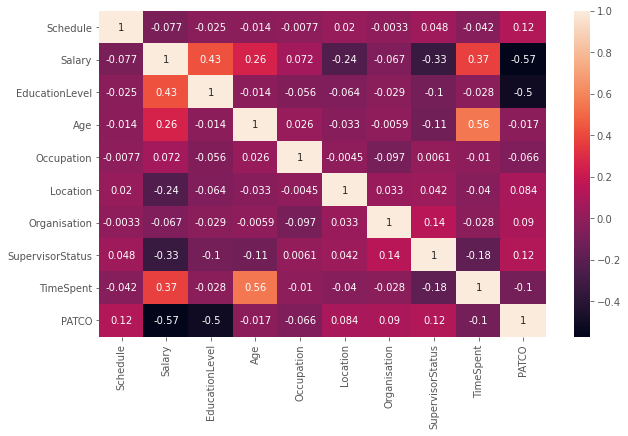

In [27]:
corr = cleaned.corr()
sn.heatmap(corr, annot=True)
plt.show()

## EDA

1. Hypothesis 
2. Qu'est qui infulence le salaire
3. Time spent 

-> Comparer 2 modèles 

# What influences the salary

From the EDA we can see that there is a big correlation between the Eduction level, age, time spent. Then there is Occupation who has a positve correlation and the remaining attributes have a negative correlation. 

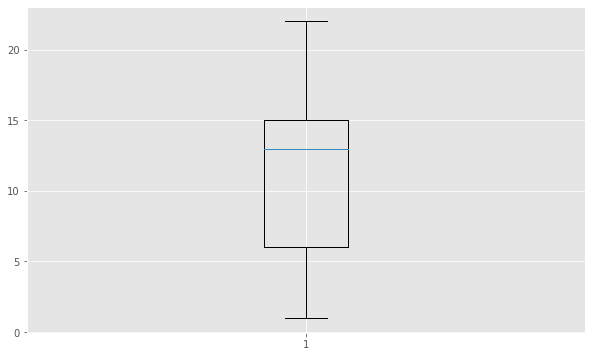

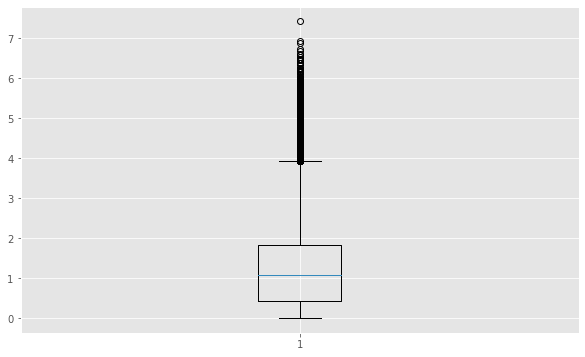

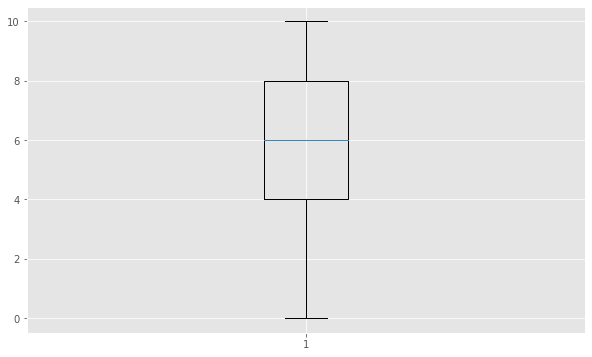

In [34]:
plt.boxplot(x=cleaned["EducationLevel"])
plt.show()

plt.boxplot(x=cleaned["TimeSpent"])
plt.show()

plt.boxplot(x=cleaned["Age"])
plt.show()